# Exploratory Data Analysis on Lichess Chess Games 2013-2014

### Import all necessary libraries for exploratory data analysis on the given dataset

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Input the dataset into a pandas' dataframe for easy manipulation and visualization

In [2]:
# input the data from the csv file
df = pd.read_csv('Lichess_2013_2014_Complete.csv')

# check if everything is inputted correctly
df.head()

,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Day,Month,Year,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,1639,1403,BFG9k,mamalak,White,Normal,https://lichess.org/j1dkb5dw,31,12,2012,600,8,Rapid,French Defense: Normal Variation,C00,13
1,1654,1919,Desmond_Wilson,savinka59,White,Normal,https://lichess.org/a9tcp02g,31,12,2012,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18
2,1643,1747,Kozakmamay007,VanillaShamanilla,White,Normal,https://lichess.org/szom2tog,31,12,2012,420,17,Rapid,Four Knights Game: Italian Variation,C50,11
3,1824,1973,Naitero_Nagasaki,800,Black,Normal,https://lichess.org/rklpc7mk,31,12,2012,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47
4,1765,1815,nichiren1967,Naitero_Nagasaki,Black,Normal,https://lichess.org/1xb3os63,31,12,2012,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23


In [3]:
# check the dataframe's dimension
df.shape

(14918230, 16)

In [4]:
# check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14918230 entries, 0 to 14918229
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   WhiteElo         int64 
 1   BlackElo         int64 
 2   WhiteName        object
 3   BlackName        object
 4   Winner           object
 5   Termination      object
 6   Site             object
 7   Day              int64 
 8   Month            int64 
 9   Year             int64 
 10  InitialTime      int64 
 11  Increment        int64 
 12  TimeControl      object
 13  Opening          object
 14  ECO              object
 15  Number_of_Moves  int64 
dtypes: int64(8), object(8)
memory usage: 1.8+ GB


### Verify data quality

In [5]:
# check for incorrect data types
df.dtypes

WhiteElo            int64
BlackElo            int64
WhiteName          object
BlackName          object
Winner             object
Termination        object
Site               object
Day                 int64
Month               int64
Year                int64
InitialTime         int64
Increment           int64
TimeControl        object
Opening            object
ECO                object
Number_of_Moves     int64
dtype: object

In [6]:
# check for missing data
df.isnull().sum().sort_values(ascending=False)

WhiteElo           0
BlackElo           0
WhiteName          0
BlackName          0
Winner             0
Termination        0
Site               0
Day                0
Month              0
Year               0
InitialTime        0
Increment          0
TimeControl        0
Opening            0
ECO                0
Number_of_Moves    0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().value_counts()

False    14918230
dtype: int64

### Separate the categorical and numerical features

In [8]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,WhiteName,BlackName,Winner,Termination,Site,TimeControl,Opening,ECO
0,BFG9k,mamalak,White,Normal,https://lichess.org/j1dkb5dw,Rapid,French Defense: Normal Variation,C00
1,Desmond_Wilson,savinka59,White,Normal,https://lichess.org/a9tcp02g,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04
2,Kozakmamay007,VanillaShamanilla,White,Normal,https://lichess.org/szom2tog,Rapid,Four Knights Game: Italian Variation,C50
3,Naitero_Nagasaki,800,Black,Normal,https://lichess.org/rklpc7mk,Bullet,Caro-Kann Defense: Goldman Variation,B12
4,nichiren1967,Naitero_Nagasaki,Black,Normal,https://lichess.org/1xb3os63,Bullet,French Defense: La Bourdonnais Variation,C00


In [9]:
df_num = df.select_dtypes(include=['int64'])
df_num.head()

,WhiteElo,BlackElo,Day,Month,Year,InitialTime,Increment,Number_of_Moves
0,1639,1403,31,12,2012,600,8,13
1,1654,1919,31,12,2012,480,2,18
2,1643,1747,31,12,2012,420,17,11
3,1824,1973,31,12,2012,60,1,47
4,1765,1815,31,12,2012,60,1,23


In [10]:
# summary stats of categorical features
df_cat.describe(include='object')

,WhiteName,BlackName,Winner,Termination,Site,TimeControl,Opening,ECO
count,14918230,14918230,14918230,14918230,14918230,14918230,14918230,14918230
unique,197819,203762,3,4,14918230,4,2990,494
top,ribarisah,ribarisah,White,Normal,https://lichess.org/j1dkb5dw,Blitz,Van't Kruijs Opening,A00
freq,25501,20406,7537136,9966773,1,6007902,395369,1172202


In [11]:
# summary stats of numerical features
df_num.describe(include='int64')

,WhiteElo,BlackElo,Day,Month,Year,InitialTime,Increment,Number_of_Moves
count,1.491823e+07,1.491823e+07,1.491823e+07,1.491823e+07,1.491823e+07,1.491823e+07,1.491823e+07,1.491823e+07
mean,1.623720e+03,1.616271e+03,1.597308e+01,7.388390e+00,2.013774e+03,3.076531e+02,2.341827e+00,3.384612e+01
std,2.299112e+02,2.339752e+02,8.806699e+00,3.393840e+00,4.184492e-01,3.692847e+02,5.410320e+00,1.589752e+01
min,5.110000e+02,7.040000e+02,1.000000e+00,1.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.471000e+03,1.463000e+03,8.000000e+00,5.000000e+00,2.014000e+03,1.200000e+02,0.000000e+00,2.300000e+01
50%,1.621000e+03,1.612000e+03,1.600000e+01,8.000000e+00,2.014000e+03,3.000000e+02,0.000000e+00,3.200000e+01
75%,1.774000e+03,1.769000e+03,2.400000e+01,1.000000e+01,2.014000e+03,3.600000e+02,3.000000e+00,4.300000e+01
max,2.970000e+03,2.970000e+03,3.100000e+01,1.200000e+01,2.014000e+03,1.080000e+04,1.800000e+02,2.270000e+02


In [12]:
# value count for each unique features for all categorical features
for cat_col in df_cat.columns:
    print (df[cat_col].value_counts())
    print ("\n---------")

ribarisah    25501
potsy722     24038
amir51       23868
fil77        20827
IgorKoc      19985
             ...  
salles300        1
BlaBlaaa         1
wmnima300        1
vrassef          1
Saphyre          1
Name: WhiteName, Length: 197819, dtype: int64

---------
ribarisah    20406
IgorKoc      19871
aavza50      17813
Grga1        16991
Geol020      15426
             ...  
Jergis           1
KillUFag         1
exitn            1
a_155            1
Polishman        1
Name: BlackName, Length: 203762, dtype: int64

---------
White    7537136
Black    6863208
Draw      517886
Name: Winner, dtype: int64

---------
Normal              9966773
Time forfeit        4941388
Abandoned              8957
Rules infraction       1112
Name: Termination, dtype: int64

---------
https://lichess.org/j1dkb5dw    1
https://lichess.org/x7WgPOZg    1
https://lichess.org/ZbQq4Lod    1
https://lichess.org/EbdTeNEf    1
https://lichess.org/IUyf7e0g    1
                               ..
https://lichess.org/

### Some basic visualization on Categorical Features

In [13]:
def pie_plotter(data, colors, title, explode, wedgecolor = 'maroon', textcolor='skyblue'):
    # plot the given data into a pie chart
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data, autopct = '%.2f%%', startangle = 90,
                                    wedgeprops={ 'linewidth' : 1, 'edgecolor' : wedgecolor },
                                    colors=colors,
                                    textprops=dict(color=textcolor),
                                    explode=explode)
    ax.legend(wedges, data.index,
            loc ="center left",
            bbox_to_anchor =(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size = 12, weight ="bold")
    ax.set_title(title)

    plt.show()

#### Visualization of the Winner Feature

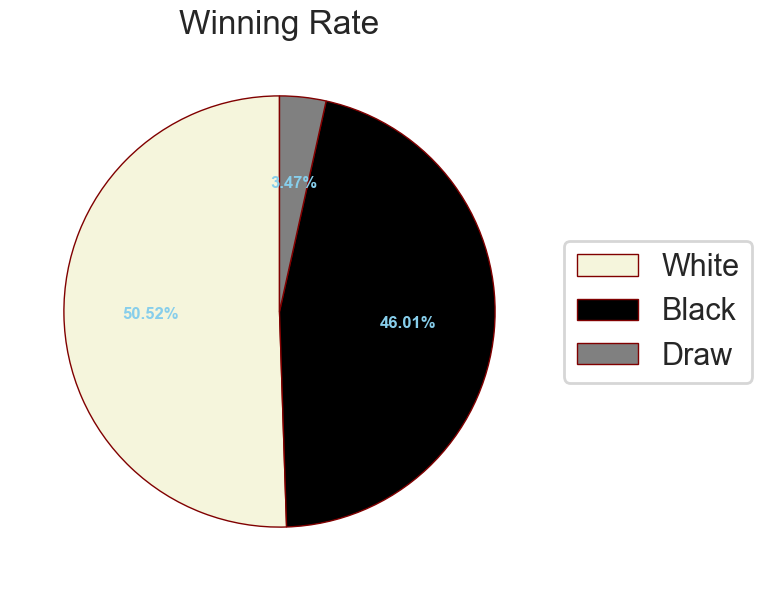

In [14]:
# setting the upper and lower limit to filter the data with
ulimit = 3000
llimit = 500

# filtering the data
df_new = df_cat[((df.WhiteElo > llimit) & (df.WhiteElo < ulimit)) & ((df.BlackElo > llimit) & (df.BlackElo < ulimit))]
plt_data = df_new['Winner'].value_counts()

# setting some visualization features
colors = ['beige', 'black', 'grey']
title = 'Winning Rate'
explode = (0,0,0)

# plot the pie chart
pie_plotter(plt_data, colors, title, explode)

#### Visualization of the Termination Feature

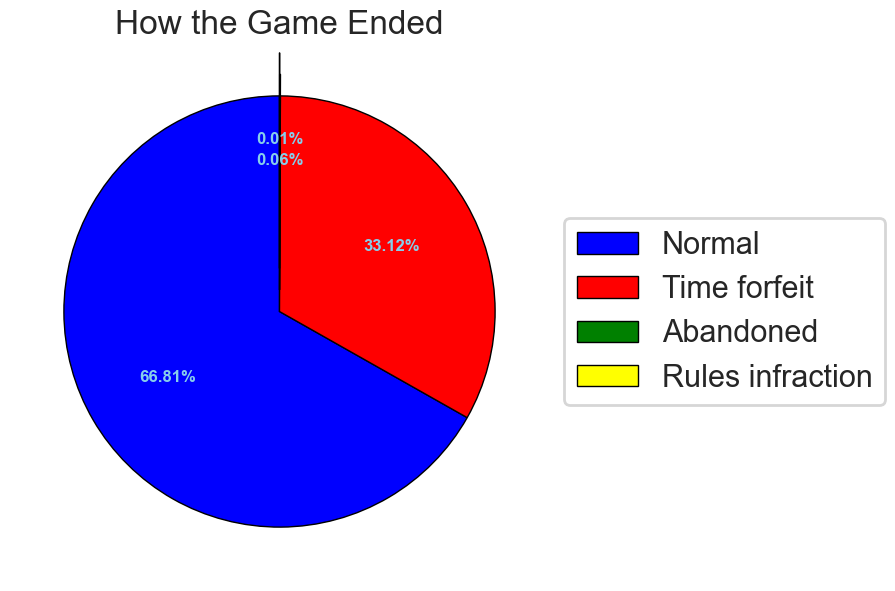

In [15]:
# filtering the data
plt_data = df_cat['Termination'].value_counts()

# setting some visualization features
colors = ['blue', 'red', 'green', 'yellow']
title = 'How the Game Ended'
explode = (0,0,0.1,0.2)

# plot the pie chart
pie_plotter(plt_data,colors,title,explode,wedgecolor='black')

#### Visualization of the Time Control Feature

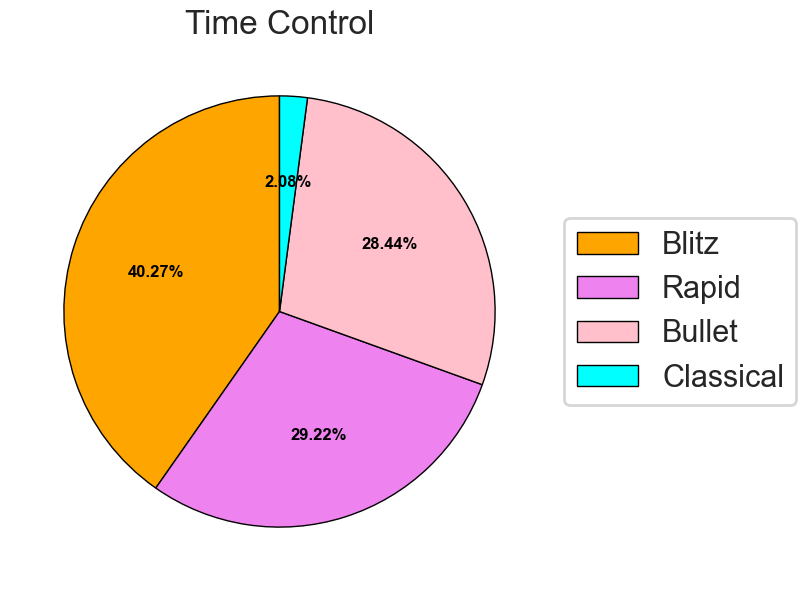

In [16]:
# filtering the data
plt_data = df_cat['TimeControl'].value_counts()

# setting some visualization features
colors = ['orange', 'violet', 'pink', 'cyan']
title = 'Time Control'
explode = (0,0,0,0)

# plot the pie chart
pie_plotter(plt_data,colors,title,explode,wedgecolor='black',textcolor='black')

### Some basic visualization of Numerical Features

#### Visualization of the Distribution of White Elo

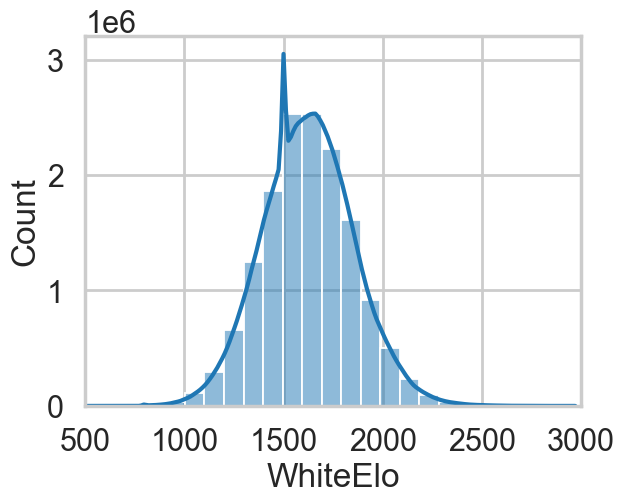

In [17]:
# plot the histogram of White Elo to show its distribution
sns.histplot(df_num['WhiteElo'], bins=25, kde=True)
plt.xlim([500, 3e3])
plt.show()

#### Visualization of the Distribution of Black Elo

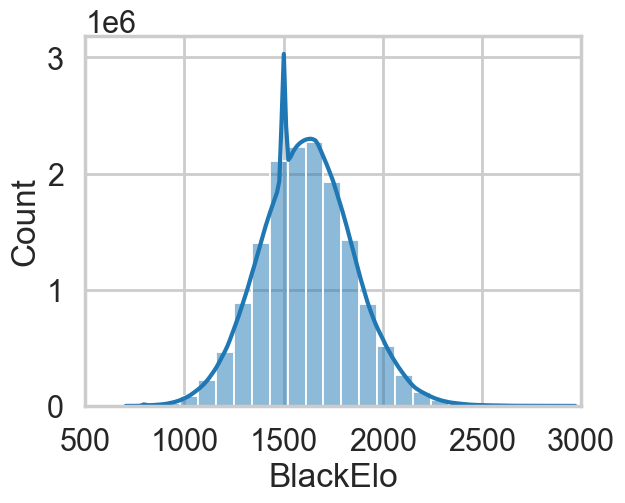

In [18]:
# plot the histogram of Black Elo to show its distribution
sns.histplot(df_num['BlackElo'], bins=25, kde=True)
plt.xlim([500, 3e3])
plt.show()

#### Box Plots for Increment and Number of Moves Feature

In [19]:
def iqr_method(data):
    # remove outliers
    Q1 = np.quantile(data,0.25)

    Q3 = np.quantile(data,0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    return lower_limit, upper_limit

<AxesSubplot:ylabel='Increment'>

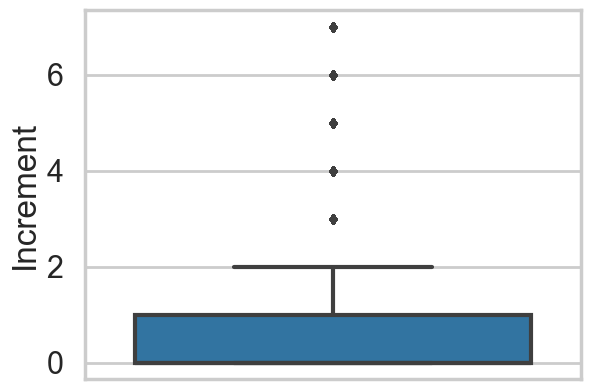

In [20]:
# filter the data with outliers removed
lower_limit, upper_limit = iqr_method(df_num.Increment)
df_temp = df_num[(df_num.Increment > lower_limit) & (df_num.Increment < upper_limit)]

# plot the box plot
sns.boxplot(data = df_temp, y = 'Increment')

<AxesSubplot:ylabel='Number_of_Moves'>

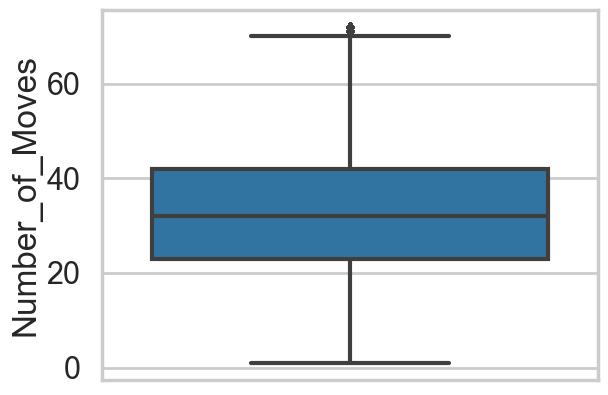

In [21]:
# filter the data with outliers removed
lower_limit, upper_limit = iqr_method(df_num.Number_of_Moves)
df_temp = df_num[(df_num.Number_of_Moves > lower_limit) & (df_num.Number_of_Moves < upper_limit)]

# plot the box plot
sns.boxplot(data = df_temp, y = 'Number_of_Moves')

### Some Additional Visualizations

In [22]:
def bar_plotter(x, y, title):
    # plot a horizontal bar graph using the given x and y

    # figure size
    fig, ax = plt.subplots(figsize =(10, 7))
    
    # horizontal bar plot
    ax.barh(x, y)
    
    # remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    # remove x, y ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    plt.xticks(fontsize=12)
    
    # add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    # add x, y gridlines
    ax.grid(visible=True, color ='grey', linewidth = 0.5, alpha = 0.2)
    
    # show top values
    ax.invert_yaxis()
 
    # add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')
    
    # add Plot Title
    ax.set_title(title,
                loc ='left', )
    
    # show Plot
    plt.show()

In [23]:
# setting the upper and lower limit again
ulimit = 3000
llimit = 500

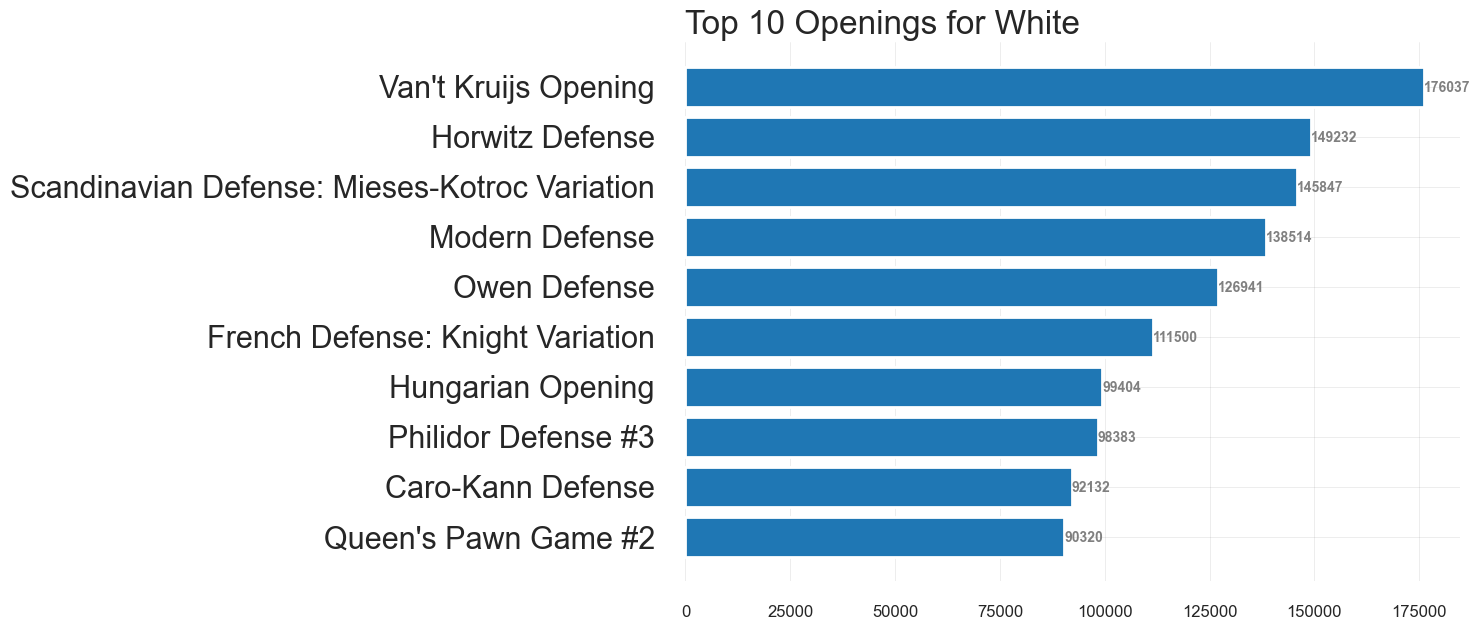

In [24]:
# filter the data
df_new = df[(df.Winner == 'White') & (df.WhiteElo > llimit) & (df.WhiteElo < ulimit)]

# only get the top 10 openings
df_filtered = df_new['Opening'].value_counts().sort_values(ascending=False)[:10]

# plot the bar graph
bar_plotter(df_filtered.index,df_filtered.values,title='Top 10 Openings for White')

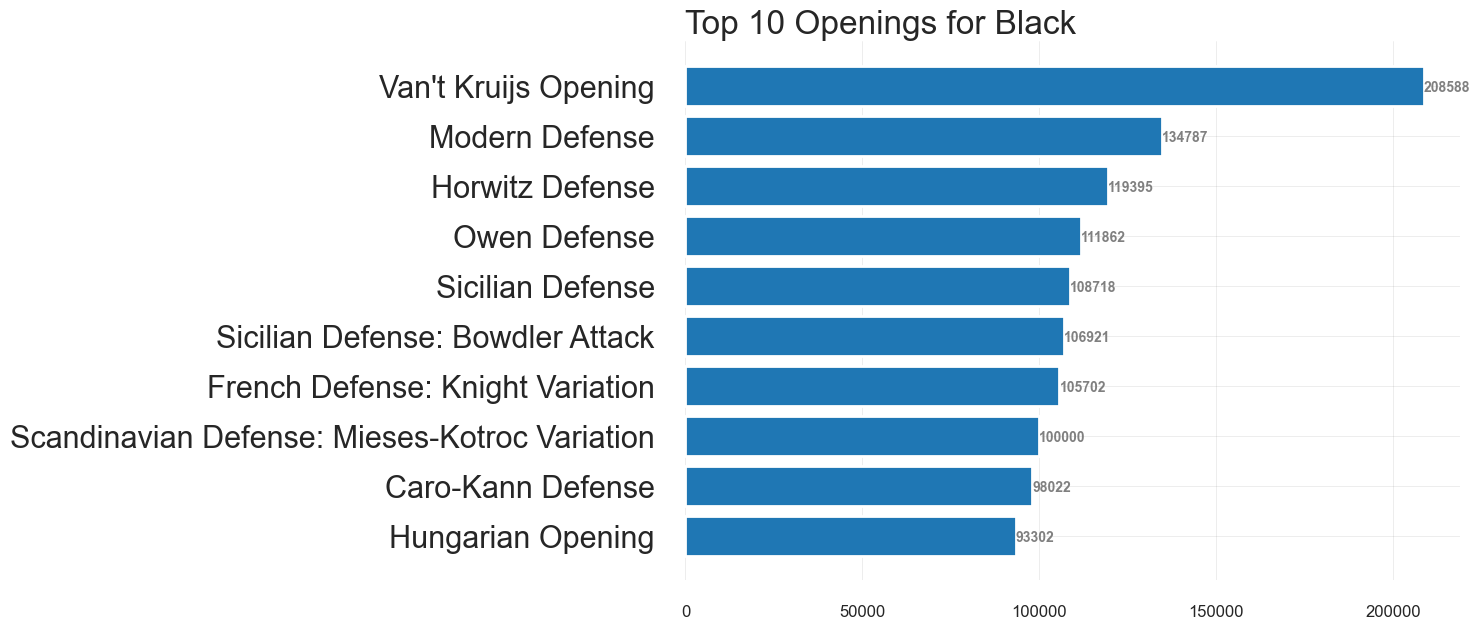

In [25]:
# filter the data
df_new = df[(df.Winner == 'Black') & (df.BlackElo > llimit) & (df.BlackElo < ulimit)]

# only get the top 10 opening
df_filtered = df_new['Opening'].value_counts().sort_values(ascending=False)[:10]

# plot the bar graph
bar_plotter(df_filtered.index,df_filtered.values,title='Top 10 Openings for Black')

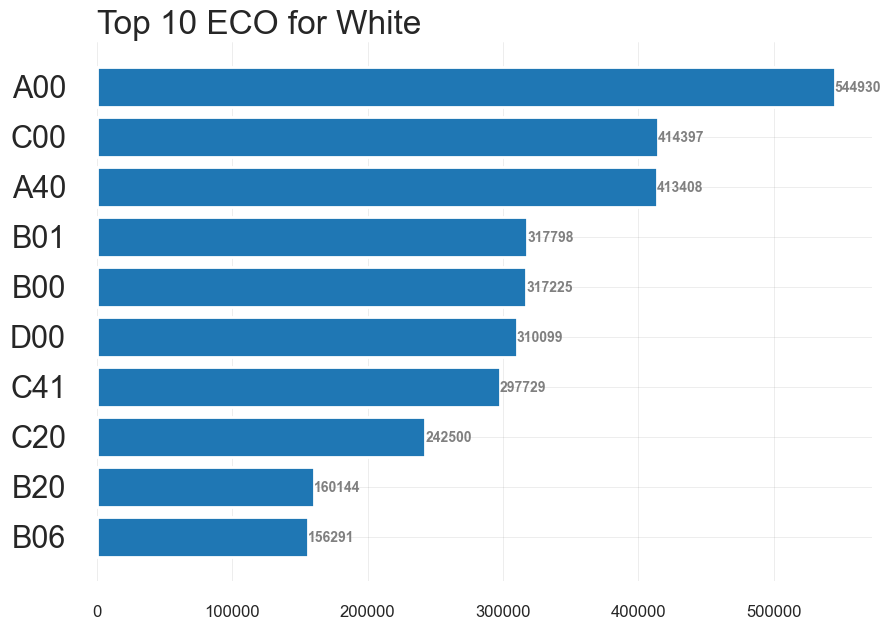

In [26]:
df_new = df[(df.Winner == 'White') & (df.WhiteElo > llimit) & (df.WhiteElo < ulimit)]
df_filtered = df_new['ECO'].value_counts().sort_values(ascending=False)[:10]
bar_plotter(df_filtered.index,df_filtered.values,title='Top 10 ECO for White')

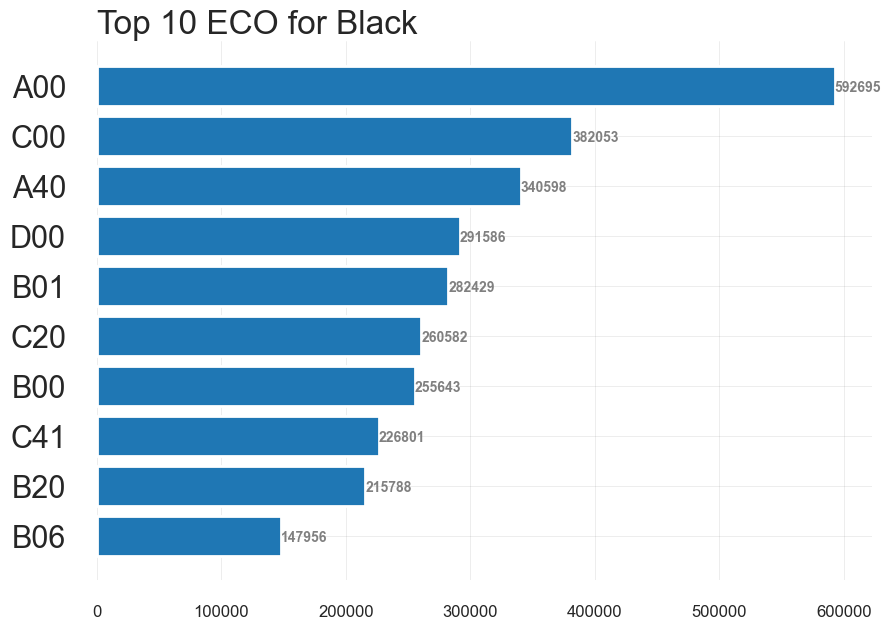

In [27]:
df_new = df[(df.Winner == 'Black') & (df.BlackElo > llimit) & (df.BlackElo < ulimit)]
df_filtered = df_new['ECO'].value_counts().sort_values(ascending=False)[:10]
bar_plotter(df_filtered.index,df_filtered.values,title='Top 10 ECO for Black')

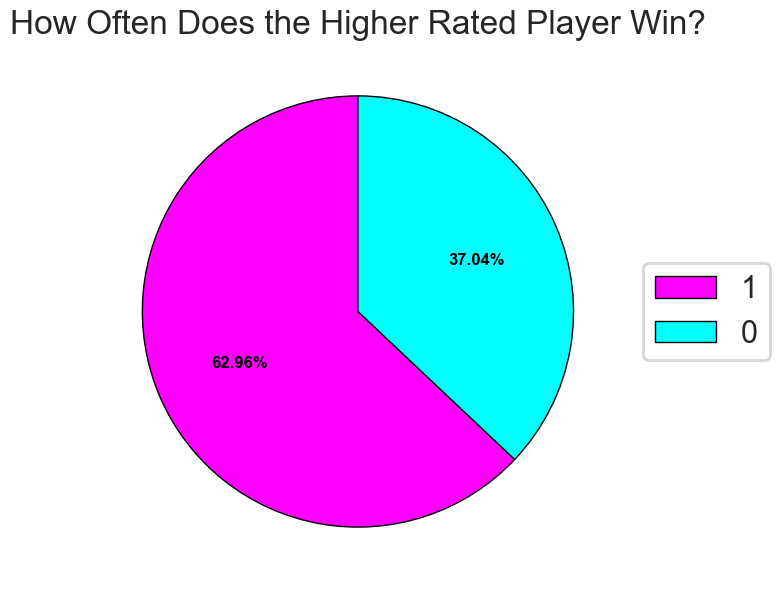

In [28]:
# create a new column to check if the one with higher rating wins the game
df['HigherRatedVictory'] = np.where(((df.Winner == 'White') & (df.WhiteElo > df.BlackElo)) | ((df.Winner == 'Black') & (df.WhiteElo < df.BlackElo)), 1, 0)

# setting some visualization feature
plt_data = df['HigherRatedVictory'].value_counts()
colors = ['magenta', 'cyan']
title = 'How Often Does the Higher Rated Player Win?'
explode = (0,0)

# plot the pie chart
pie_plotter(plt_data,colors,title,explode,wedgecolor='black', textcolor='black')

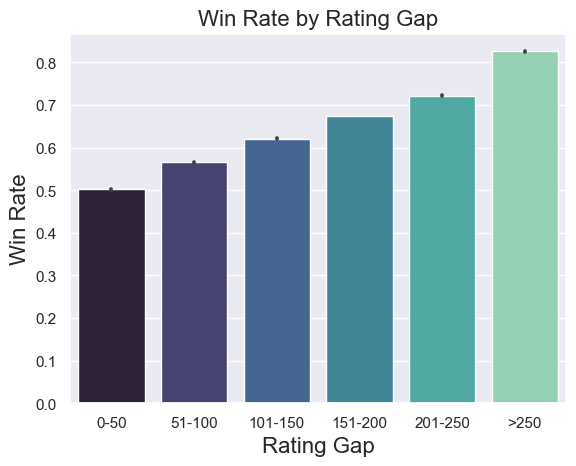

<function matplotlib.pyplot.clf()>

In [29]:
# create two new columns containing the rating gap and rating gap classs
df['RatingGap'] = abs(df['WhiteElo'] - df['BlackElo'])
df['RatingGapClass'] = df.RatingGap.apply(lambda x: '0-50' if (x <= 50) else ('51-100' if (x > 50 and x <= 100) else ('101-150' if (x > 100 and x <= 150) else ('151-200' 
                                            if (x > 150 and x <= 200) else ('201-250' if (x > 200 and x <= 250) else '>250')))))

# plot the bar graph
sns.set(font_scale = 1)
sns.barplot(
    data=df,
    x='RatingGapClass',
    y='HigherRatedVictory',
    order=['0-50', '51-100', '101-150', '151-200', '201-250', '>250'],
    palette='mako', 
)
plt.xlabel('Rating Gap', fontsize=16)
plt.ylabel('Win Rate', fontsize=16)
plt.title('Win Rate by Rating Gap', fontsize=16)
plt.show()
plt.clf

#### Visualizaing the Correlation of the Numerical Features

In [30]:
df_num1 = df_num[['WhiteElo','BlackElo','InitialTime','Increment', 'Number_of_Moves']]
corr = df_num1.corr()
corr

,WhiteElo,BlackElo,InitialTime,Increment,Number_of_Moves
WhiteElo,1.000000,0.630769,-0.152924,-0.126940,0.140018
BlackElo,0.630769,1.000000,-0.152487,-0.124079,0.157436
InitialTime,-0.152924,-0.152487,1.000000,0.450276,-0.016472
Increment,-0.126940,-0.124079,0.450276,1.000000,-0.036216
Number_of_Moves,0.140018,0.157436,-0.016472,-0.036216,1.000000


C:\Users\Joshua\AppData\Local\Temp\ipykernel_22044\2520848769.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

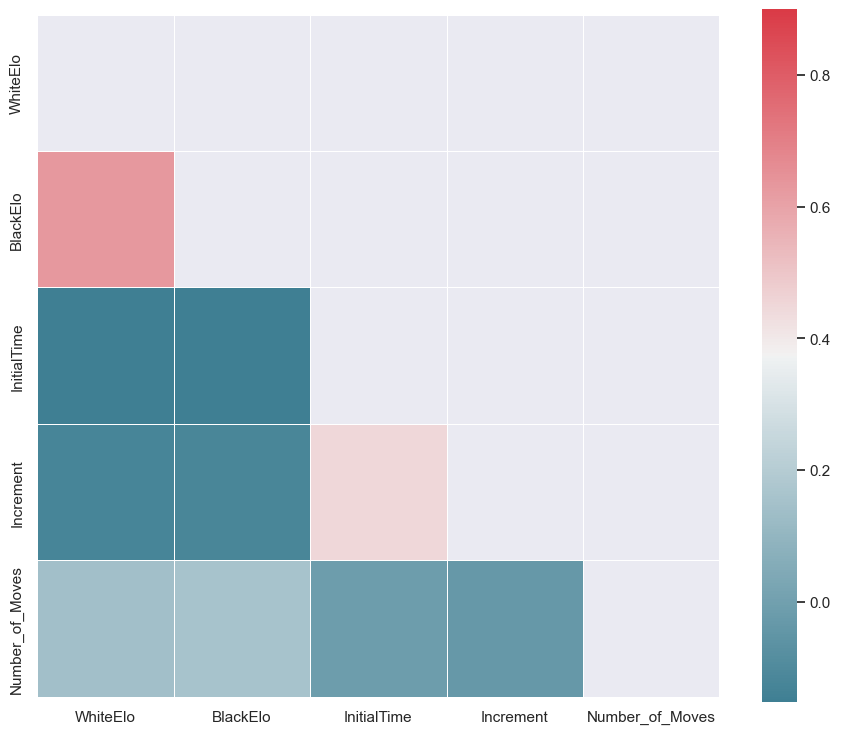

In [31]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)